In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt

base_dir = "data/Data_Brain/Train"

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]




ModuleNotFoundError: No module named 'cv2'

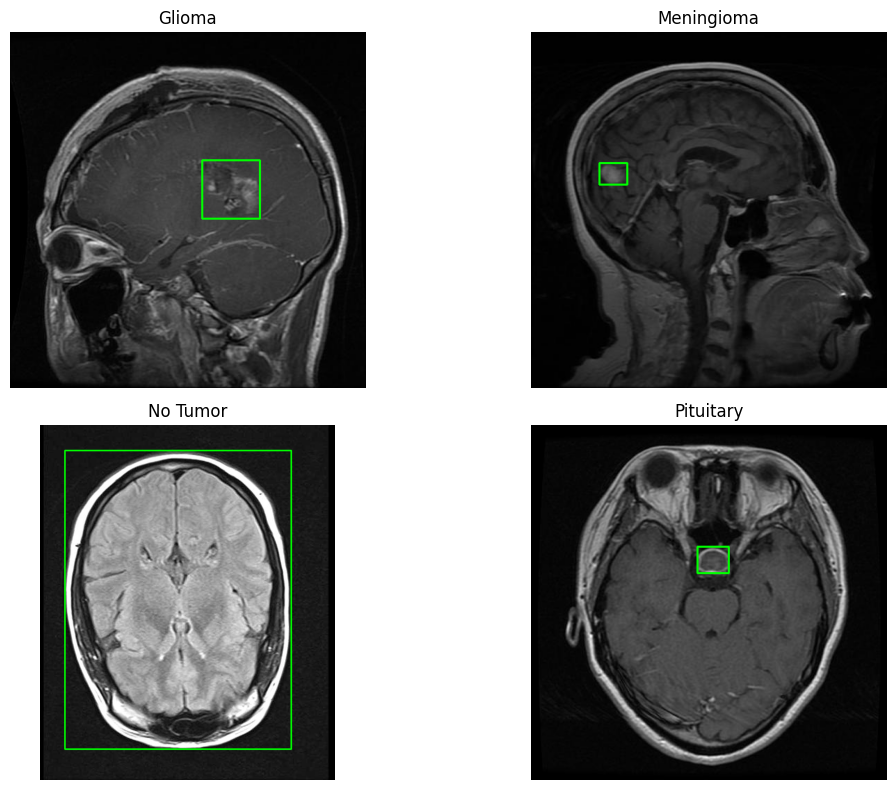

In [ ]:

def draw_yolo_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x_center, y_center, bw, bh = map(float, parts)
            cls_id = int(cls_id)

            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

plt.figure(figsize=(12, 8))

all_images = []
for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not images:
        continue
    img_file = random.choice(images)

    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    if os.path.exists(label_path):
        img = draw_yolo_boxes(img_path, label_path)
    else:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

for cls in classes:
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    all_images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not all_images:
        continue

    train_images, valid_images = train_test_split(all_images, test_size=0.2, random_state=42)

    for split in ["train", "valid"]:
        img_split_dir = os.path.join(base_dir, cls, "images", split)
        label_split_dir = os.path.join(base_dir, cls, "labels", split)
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    for split_name, split_list in [("train", train_images), ("valid", valid_images)]:
        for img_name in split_list:
            img_path = os.path.join(img_dir, img_name)
            label_name = os.path.splitext(img_name)[0] + ".txt"
            label_path = os.path.join(label_dir, label_name)

            if os.path.exists(label_path):
                img_dest = os.path.join(base_dir, cls, "images", split_name, img_name)
                label_dest = os.path.join(base_dir, cls, "labels", split_name, label_name)

                shutil.copy(img_path, img_dest)
                shutil.copy(label_path, label_dest)
            else:
                print(f"⚠️ Label manquant pour l'image {img_name}, elle sera ignorée.")

In [ ]:
base_dir = "data/Data_Brain/Train"
classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

total_train_imgs = 0
total_train_labels = 0
total_valid_imgs = 0
total_valid_labels = 0

for cls in classes:
    print(f"-{cls}")
    for split in ["train", "valid"]:
        img_dir = os.path.join(base_dir, cls, "images", split)
        label_dir = os.path.join(base_dir, cls, "labels", split)

        img_files = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

        num_imgs = len(img_files)
        num_labels = len(label_files)

        if split == "train":
            total_train_imgs += num_imgs
            total_train_labels += num_labels
        else:
            total_valid_imgs += num_imgs
            total_valid_labels += num_labels

        print(f"{split} : {num_imgs} images, {num_labels} labels")


print(f"Train : {total_train_imgs} images / {total_train_labels} labels")
print(f"Valid : {total_valid_imgs} images / {total_valid_labels} labels")



-Glioma
train : 922 images, 922 labels
valid : 231 images, 231 labels
-Meningioma
train : 1159 images, 1159 labels
valid : 290 images, 290 labels
-No Tumor
train : 568 images, 568 labels
valid : 143 images, 143 labels
-Pituitary
train : 1139 images, 1139 labels
valid : 285 images, 285 labels
Train : 3788 images / 3788 labels
Valid : 949 images / 949 labels


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model2 = YOLO("yolov8n.pt")
results = model.train(data="data.yaml", epochs=100, imgsz=640, device=0)
results2 = model2.train(data="data2.yaml", epochs=100, imgsz=640, device=0)


Ultralytics 8.3.219  Python-3.13.7 torch-2.9.0+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [ ]:
model.val()


In [ ]:
results = model.predict(source="test.jpg")
